In [1]:
import pandas as pd
import numpy as np


In [147]:
from scipy import sparse
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [30]:
LD = np.load('/gpfs/commons/groups/knowles_lab/data/ldsc/polyfun/ukb_ld/chr17_43000001_46000001.npz')
LD_info = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ldsc/polyfun/ukb_ld/chr17_43000001_46000001.gz', compression='gzip', sep = '\t')
snp = pd.read_csv("/gpfs/commons/home/tlin/data/clean_bellenguez_ld_snp_only.tsv", sep = '\t', names = ['RSID'])

In [35]:
snp.shape

(914, 1)

In [46]:
LD_info[LD_info["rsid"].isin(snp["RSID"])]
index = LD_info[LD_info["rsid"].isin(snp["RSID"])].index.values.tolist()

In [41]:
LD_info[LD_info["rsid"].isin(snp["RSID"])][LD_info[LD_info["rsid"].isin(snp["RSID"])].rsid.duplicated()]


,rsid,chromosome,position,allele1,allele2
7342,rs9901937,17,44063723,A,G
7936,rs62063678,17,44129949,C,T


In [54]:
lst = LD.files
for item in lst:
    print(item)
    print(LD[item])

row
[    0     1     1 ... 18126 18126 18126]
col
[    0     0     1 ... 18124 18125 18126]
format
b'coo'
shape
[18127 18127]
data
[ 0.5         0.74035674  0.5        ...  0.19286476 -0.03321372
  0.5       ]


In [72]:
print(LD["row"][1:10])
print(LD["col"][1:10])

index = LD_info[LD_info["rsid"].isin(snp["RSID"])].index.values.tolist()
index


[1 1 2 2 2 3 3 3 3]
[0 1 0 1 2 0 1 2 3]


In [60]:
type(LD_score)
LD_score.shape

(164303126,)

In [78]:
(1+18127)*18127/2 -2   ####正解在這 

164303126.0

In [81]:
row = LD["row"]
column = LD["col"]
value = LD["data"]

In [84]:
coo = sparse.coo_matrix((value, (row, column)), shape=(18128, 18128))
print(coo)

  (0, 0)	0.5
  (1, 0)	0.74035674
  (1, 1)	0.5
  (2, 0)	-0.11239206
  (2, 1)	-0.08293868
  (2, 2)	0.5
  (3, 0)	-0.010596612
  (3, 1)	-0.012308427
  (3, 2)	-0.0041391854
  (3, 3)	0.5
  (4, 0)	0.23585221
  (4, 1)	-0.14005768
  (4, 2)	-0.026777498
  (4, 3)	0.00801599
  (4, 4)	0.5
  (5, 0)	0.069515385
  (5, 1)	0.0940516
  (5, 2)	-0.009213859
  (5, 3)	0.000576206
  (5, 4)	-0.013354334
  (5, 5)	0.5
  (6, 0)	0.21101461
  (6, 1)	-0.124569476
  (6, 2)	-0.02300418
  (6, 3)	0.0088136755
  :	:
  (18126, 18102)	-0.001889159
  (18126, 18103)	0.99039173
  (18126, 18104)	-0.0008194959
  (18126, 18105)	-0.04619878
  (18126, 18106)	0.06537531
  (18126, 18107)	0.35953316
  (18126, 18108)	0.35917145
  (18126, 18109)	-0.40845087
  (18126, 18110)	-0.015084788
  (18126, 18111)	-0.026091848
  (18126, 18112)	-0.0110866865
  (18126, 18113)	-0.0133766765
  (18126, 18114)	-0.019575259
  (18126, 18115)	-0.0037072944
  (18126, 18116)	0.022746721
  (18126, 18117)	-0.02610436
  (18126, 18118)	0.35260952
  (18126, 1811

In [86]:
coo_dense = coo.todense()

In [108]:
coo_dense.shape

(18128, 18128)

In [137]:
coo_dense[np.ix_(index[1:10],index[1:10])]

matrix([[0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 1. , 1. , 0.5, 0. , 0. , 0. , 0. , 0. ],
        [1. , 1. , 1. , 1. , 0.5, 0. , 0. , 0. , 0. ],
        [1. , 1. , 1. , 1. , 1. , 0.5, 0. , 0. , 0. ],
        [1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0. , 0. ],
        [1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0. ],
        [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5]], dtype=float32)

In [130]:
coo_dense[1:3:1,1:8:2]



matrix([[ 0.5       ,  0.        ,  0.        ,  0.        ],
        [-0.08293868,  0.        ,  0.        ,  0.        ]],
       dtype=float32)

In [121]:
coo_dense[[1,2,3],[1,2,3]]

matrix([[0.5, 0.5, 0.5]], dtype=float32)

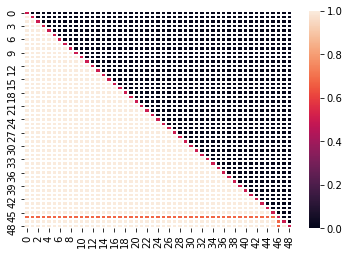

In [140]:
ax = sns.heatmap(coo_dense[np.ix_(index[1:50],index[1:50])], linewidth=1)
plt.show()

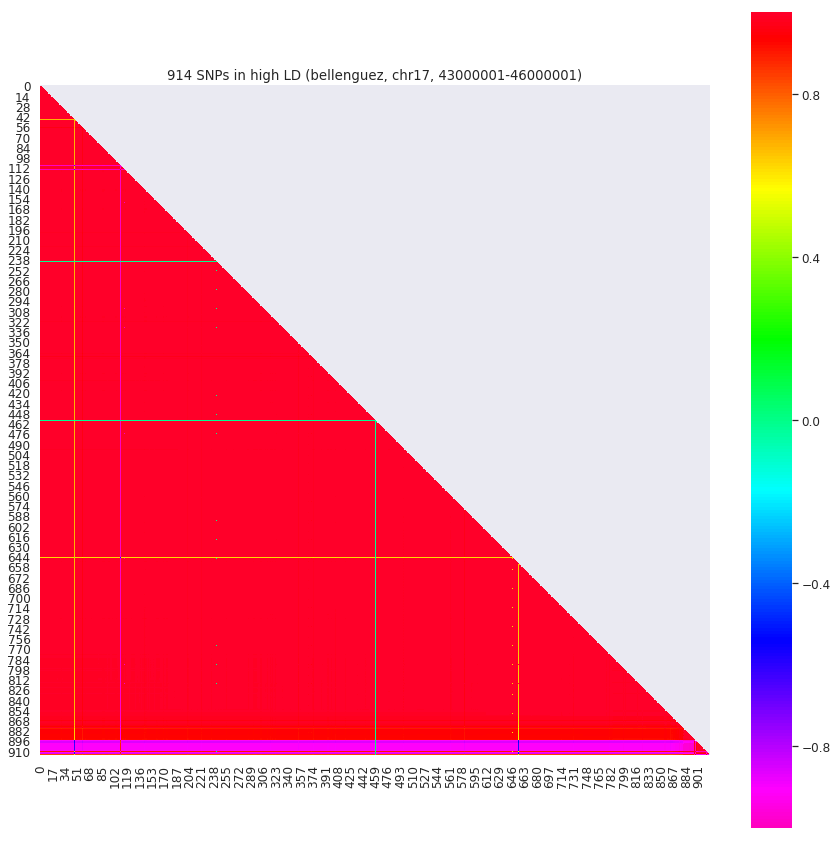

In [177]:
plt.figure(figsize=(15, 15))

mask = np.zeros_like(coo_dense[np.ix_(index,index)])
mask[np.triu_indices_from(mask)] = True



with sns.axes_style("white"):
    sns.set(font_scale=1.1)
    ax = sns.heatmap(coo_dense[np.ix_(index,index)], mask=mask, square=True,  cmap="gist_rainbow_r", vmin=-1, vmax=1)
    ax.set(title="914 SNPs in high LD (bellenguez, chr17, 43000001-46000001)")
    plt.savefig("/gpfs/commons/home/tlin/pic/LD_heatmap_notransparant")
    #plt.savefig("/gpfs/commons/home/tlin/pic/LD_heatmap", transparent=True)
    plt.show()
    
    

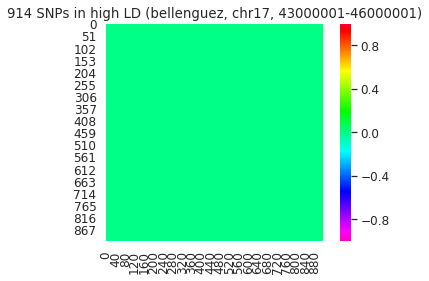

In [65]:
snp.RSID[1:100]

1       rs8079501
2      rs56002706
3       rs8078495
4      rs17649866
5      rs62058968
6      rs17564493
7      rs17649918
8      rs17649954
9      rs55685451
10     rs17564591
11     rs17564619
12     rs62059003
13     rs17650063
14     rs17564703
15     rs76090253
16     rs55788597
17     rs56197117
18     rs56249311
19     rs62059004
20     rs76500077
21     rs62059005
22    rs113313477
23    rs113796169
24     rs17564780
25     rs62059007
26     rs62061705
27     rs17564829
28     rs62061706
29     rs62061707
30     rs62061708
         ...     
70    rs113537106
71     rs62061727
72     rs62061728
73     rs62061729
74     rs62061730
75     rs62061731
76     rs62061732
77     rs62062768
78     rs62062769
79     rs62062770
80     rs62062771
81     rs62062772
82     rs62062773
83     rs79115768
84     rs28416808
85     rs62062774
86      rs2316784
87      rs4327091
88      rs4479290
89     rs62062776
90     rs75839508
91     rs75686108
92     rs78834738
93     rs62062778
94     rs6